## **03-3) 특성 공학과 규제**

- 여러 특성을 사용한 다중 회귀에 대해 배우고 사이킷런의 여러 도구를 사용한다.<br>
- 복잡한 모델의 과대적합을 막기 위한 릿지와 라쏘 회귀를 배운다.

**다항 회귀**로도 농어의 무게를 어느 정도 예측할 수 있었지만, 여전히 과소적합 문제가 해결되지 않았었다.<br>


### **다중 회귀**(Multiple Regression)

이번에는 **여러 개의 특성을 사용한 선형 회귀 모델**인 **다중 회귀**를 훈련시켜보자.<br>
특성이 많으면 선형 모델은 강력한 성능을 발휘한다.

이 예제에서는 농어의 길이뿐만 아니라 농어의 높이와 두께도 함께 사용할 것이다.<br>
또한 3개의 특성을 각각 제곱해서 추가할 것이고, 거기다가 각 특성을 서로 곱해서 또 다른 특성을 만들 것이다.<br>
즉, **`농어 길이 * 농어 높이`**를 새로운 특성으로 만드는 것이다.

이렇게 **기존의 특성을 사용해 새로운 특성을 뽑아내는 작업**을 **특성 공학**(feature engineering)이라고 한다.

### **데이터 준비**

데이터 분석 라이브러리인 **`판다스(pandas)`**를 사용하여 농어 데이터를 인터넷에서 내려받아 **데이터프레임**에 저장해보자.<br>
그다음 넘파이 배열로 변환하여 선형 회귀 모델을 훈련할 것이다.
<br><br>

+) **데이터프레임**은 판다스의 핵심 데이터 구조로, 넘파이 배열과 비슷하게 다차원 배열을 다룰 수 있으며, 훨씬 더 많은 기능을 제공한다.



In [1]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

타깃 데이터는 이전과 동일한 방식으로 준비한다.

In [2]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

그다음 perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나눈다.

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

이제 이 데이터를 사용해 새로운 특성을 만들 것이다.

### **사이킷런의 변환기**

#### **변환기**(transformer)
사이킷런에서 특성을 만들거나 전처리하기 위한 클래스<br>
+) LinearRegression 같은 사이킷런의 모델 클래스는 **추정기**(estimator)라고 한다.

우리가 사용할 변환기는 **PolynomialFeatures** 클래스이다. 이 클래스는 주어진 특성을 조합하여 새로운 특성을 만든다.<br>
먼저 훈련(fit)을 한 뒤 변환(transform)한다. 
1. fit()에서 새롭게 만들 특성 조합을 찾고, 
2. transform()에서 실제로 데이터를 변환한다.<br>

이때 변환기는 타깃 데이터 없이 입력 데이터를 변환한다.

<br>train_input에 적용하기 전 간단한 샘플 먼저 적용해보자.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


2개의 특성(원소)을 가진 샘플[2,3]이 6개의 특성을 가진 샘플 [1,2,3,4,6,9]로 변환되었다.<br><br>

이처럼 PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가한다. 
<br>그렇다면 1이 추가된 이유는 무엇일까?<br><br>
$$무게 = a*길이 + b*높이 + c*두께 + d*1$$
<br>위 선형 방정식에서 절편은 항상 값이 1인 특성과 곱해지는 계수라 볼 수 있기 때문에 1이 추가되는 것이다. 하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 `include_bias=False`를 지정하여 절편을 위한 항을 제거하자.



이제 train_input에 적용해보자. train_input을 변환한 데이터를 train_poly에 저장하고 이 배열의 크기를 확인해보자.

In [6]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


9개의 특성이 어떻게 만들어졌는지 확인하려면 get_feature_names_out() 메서드를 호출하면 된다.

In [7]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

`x0`은 첫 번째 특성을, `x0^2`는 첫 번째 특성의 제곱, `x0 x1`은 첫 번째 특성과 두 번째 특성의 곱을 나타내는 식이다.<br><br>
이제 테스트 세트를 변환해보자.<br>
훈련 세트에 적용했던 변환기로 테스트 세트를 변환하는 습관을 들이는 것이 좋다.

In [8]:
test_poly = poly.transform(test_input)

### **다중 회귀 모델 훈련하기**

앞서 변환한 특성을 사용하여 다중 회귀 모델을 훈련할 것이다.

다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다. 다만 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것 뿐이다.

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


아주 높은 점수가 나왔다. 특성이 늘어나면 선형 회귀의 능력이 매우 향상된다는 것을 알 수 있다.<br>
테스트 세트에 대한 점수도 확인해보자.

In [10]:
print(lr.score(test_poly, test_target))

0.9714559911594134


테스트 세트에 대한 점수는 높아지지 않았지만, 농어의 길이만 사용했을 때 있던 과소적합 문제는 해결되었다.

그럼 특성을 더 많이 추가하면 어떻게 되는지 살펴보자. PolynomialFeatures 클래스의 degree 매개변수를 사용하여 필요한 고차항의 최대 차수를 지정할 수 있다. 5제곱까지 특성을 만들어 출력해 볼 것이다.

In [13]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)                   

(42, 55)


55개의 특성이 만들어졌다. 이 데이터를 사용해 선형 회귀 모델을 다시 훈련해보자.

In [15]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991097
-144.40579242684848


훈련 세트에 대한 점수는 거의 완벽한 반면, 테스트 세트에 대한 점수는 아주 큰 음수가 나와버렸다.<br>
특성의 개수를 크게 늘리면 선형 모델이 아주 강력해져서 훈련 세트에 대해서는 거의 완벽하게 학습할 수 있지만, <br>그만큼 훈련 세트에 너무 과대적합되어 테스트 세트에서는 형편없는 점수를 만들게 된다.

이 문제를 해결하려면 다시 특성을 줄여야 할 것이다. <br>
그러나 여기서는 과대적합을 줄이는 또 다른 방법인 **규제**에 대해 알아볼 것이다.

### **규제**(Regularization)

**규제**는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것이다. 즉, **모델이 훈련 세트에 과대적합되지 않도록** 만드는 것이다.<br>
선형 회귀 모델의 경우 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 일이다.

앞서 55개의 특성으로 훈련한 선형 회귀 모델의 계수를 규제하여 훈련 세트의 점수를 낮추고 대신 테스트 세트의 점수를 높여 볼 것이다.

그 전에 **특성의 스케일**에 대해 생각해 볼 필요가 있다. 특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값이 차이나게 되므로, <br>일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않을 것이다.

그렇다면 규제를 적용하기 전에 먼저 정규화를 해야 한다는 것인데,<br>
이전에 평균과 표준편차를 직접 구해 특성을 표준점수로 바꿨던 방법과 달리 사이킷런에서 제공하는 **StandardScaler 클래스**를 사용해볼 것이다.

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

# 표준점수로 변환
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 한다.<br>
이 두 모델은 규제를 가하는 방법이 다르다. 
- 릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고,
- 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다. <br>



일반적으로 릿지를 조금 더 선호한다.<br>
두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있다.

### **릿지 회귀**

앞서 준비한 train_scaled 데이터로 릿지 모델을 훈련해보자.

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


선형 회귀보다 점수가 조금 낮아졌다. 테스트 세트에 대한 점수를 확인해보자.

In [18]:
print(ridge.score(test_scaled, test_target))

0.9790693977615397


테스트 세트 점수가 정상으로 돌아왔다. 확실히 많은 특성을 사용했음에도 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있다.

릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다.<br><br>
모델 객체를 만들 때 **alpha 매개변수**로 **규제의 강도를 조절**한다. <br>
- alpha 값이 크면, 규제 강도가 세지므로 계수 값을 더 줄이고, 조금 더 과소적합되도록 유도한다.
- alpha 값이 작으면, 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다. 

#### **+) 하이퍼파라미터**
alpha 값과 같이 머신러닝 모델이 학습하는 값이 아니라 사람이 사전에 지정해야 하는 파라미터

적절한 alpha 값을 찾는 한 가지 방법은 alpha 값에 대한 $R^2$ 값의 그래프를 그려보는 것이다.<br>
훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다.<br>
먼저 alpha 값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트가 필요하다.

In [19]:
import matplotlib.pyplot as plt

train_score = []
test_score = [] 

alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장한다.

In [21]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))


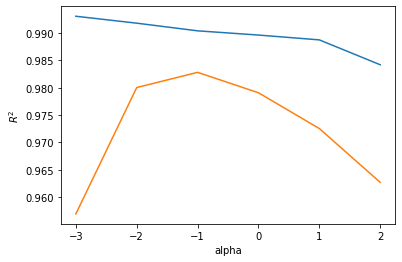

In [23]:
# alpha를 0.001부터 10배씩 늘렸기 때문에 그래프 왼쪽이 너무 촘촘해질 것.
# ~> alpha_list의 값들을 로그 함수로 바꿔 지수로 표현하여 동일한 간격으로 나타냄
# ex) 0.001 => -3, 0.01 => -2
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.show()

위 파란색이 훈련 세트 그래프이고, 아래 주황색이 테스트 세트 그래프이다. <br>
- 이 그래프의 왼쪽에서는 훈련 세트에는 잘 맞고 테스트 세트에는 형편없는 과대적합의 전형적인 모습을 보인다.<br>
- 반대로 오른쪽에서는 훈련 세트와 테스트 세트의 점수가 모두 낮아지는 과소적합의 모습을 보인다.
- 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1, 즉 10<sup>-1</sup> = 0.1이다.


그러면 alpha 값을 0.1로 하여 최종 모델을 훈련해보자.

In [24]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


이 모델은 훈련 세트와 테스트 세트의 점수가 비슷하게 모두 높고, 과대적합과 과소적합 사이에서 균형을 맞추고 있다.

### **라쏘 회귀**

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


 라쏘 역시 릿지만큼 과대적합을 잘 억제한 결과를 보여준다. <br><br>
 라쏘 모델도 **alpha 매개변수**로 규제의 강도를 조절할 수 있다.


In [28]:
train_score = []
test_score = [] 

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


❗ **ConvergenceWarning**<br>
사이킷런의 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이런 경고가 발생한다.

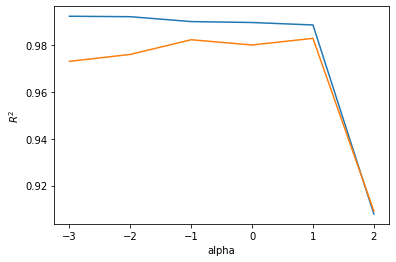

In [29]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.show()

- 이 그래프의 왼쪽은 과대적합을 보여주고 있고,
- 오른쪽으로 갈수록 훈련 세트와 테스트 세트의 점수가 좁혀지고 있다.
- 가장 오른쪽의 아주 크게 점수가 떨어지는 지점은 과소적합되는 모델일 것이다.
- 이 라쏘 모델에서 최적의 alpha 값은 1, 즉 10<sup>1</sup>이다. <br><br>

이 값으로 다시 모델을 훈련해보자.

In [30]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


특성을 많이 사용했지만, 릿지와 마찬가지로 라쏘 모델이 과대적합을 잘 억제하고 테스트 테스의 성능을 크게 높였다. 

앞에서 라쏘 모델은 계수 값을 아예 0으로 만들 수 있다고 했었다. <br>
라쏘 모델의 계수는 coef_ 속성에 저장되어 있다. <br>
그럼 이 중 0인 것을 헤아려 보자.

In [31]:
print(np.sum(lasso.coef_ == 0))

40


55개의 특성 중 40개의 특성의 계수가 0이 되었다. 라쏘 모델이 사용한 특성이 15개라는 말이다.<br> 이런 특징 때문에 라쏘 모델을 유용한 특성을 골라내는 용도로 사용하기도 한다.

 이로써 규제를 적용한 선형 모델을 사용해 농어의 무게를 잘 예측하였다.😏